In [106]:
import pandas as pd
import numpy as np

In [107]:
data = pd.read_csv('data/ML_ready.csv', index_col=0)

In [108]:
data.head()

,Organization,Capital Program,Program Subclass,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Project Description,Project URL,...,start,end,duration,prior,prior_requests,prior_collisions,prior_traffic,start_year,prior_collisions4,evidence
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,Stephen St Sidewalk Rehabilitation,NaN,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,612,5185.737705,2019,2448,0.0
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,"Catch basin repair, drainage improvement and p...",NaN,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,340,7113.609756,2019,1360,0.0
2,Utilities Kingston,Utilities Construction,Electrical,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,Pole line design on Bagot St. from Barrack to ...,NaN,...,2017-01-01,2017-12-31,364 days 00:00:00.000000000,2016-01-01,0,461,5992.635294,2017,461,0.0
3,Utilities Kingston,Utilities Construction,Electrical,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,Additional information to be provided by Utili...,NaN,...,2015-01-01,2015-12-31,364 days 00:00:00.000000000,2014-01-01,0,0,6430.750000,2015,0,0.0
4,Utilities Kingston,Utilties Rehabilitation,Water,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,"Watermain relining on Indian Rd, from Old Quar...",NaN,...,2018-01-01,2018-12-31,364 days 00:00:00.000000000,2017-01-01,0,289,10790.975610,2018,289,1.0


In [109]:
data.columns

Index(['Organization', 'Capital Program', 'Program Subclass', 'Project Title',
       'Project Planning From', 'Project Planning To',
       'Planned Construction From', 'Planned Construction To',
       'Project Description', 'Project URL', 'SDE ID', 'GeoJSON',
       'geo_point_2d', 'lat', 'lon', 'rect', 'start', 'end', 'duration',
       'prior', 'prior_requests', 'prior_collisions', 'prior_traffic',
       'start_year', 'prior_collisions4', 'evidence'],
      dtype='object')

In [110]:
data.Organization.value_counts()

Utilities Kingston         121
City Engineering           110
Transportation Services     52
Parks and Development       24
Transit Services             3
Other                        2
Name: Organization, dtype: int64

In [111]:
data['Program Subclass'].value_counts()

Water                                           64
Mill and Pave                                   37
Existing Parks                                  25
Wastewater                                      24
Gas                                             18
Drainage Improvements                           17
Surface Treatment                               17
New Traffic Signal                              12
Local Repair / Preventative Maintenance         11
Electrical                                      10
Sidewalk Construction                            9
Bike Lane                                        8
Sidewalk Rehabilitation                          7
Traffic Calming                                  7
Electric                                         7
Microsurfacing                                   6
New Road Construction                            5
Multi-use Pathway                                4
New Parks                                        3
Bus Pad Construction           

In [112]:
data.duration

0      364 days 00:00:00.000000000
1      364 days 00:00:00.000000000
2      364 days 00:00:00.000000000
3      364 days 00:00:00.000000000
4      364 days 00:00:00.000000000
                  ...             
142    514 days 00:00:00.000000000
143    514 days 00:00:00.000000000
144    304 days 00:00:00.000000000
145    362 days 00:00:00.000000000
152    364 days 00:00:00.000000000
Name: duration, Length: 314, dtype: object

In [113]:
data.rect.value_counts()

Rectangle(xmin=-76.55829693566604, ymin=44.188289663410536, xmax=-76.5313474659218, ymax=44.30410939668479)     90
Rectangle(xmin=-76.50651751644592, ymin=44.169986523033835, xmax=-76.47926916567926, ymax=44.29120450428031)     2
Rectangle(xmin=-76.50848622869822, ymin=44.1649296377307, xmax=-76.4769085806891, ymax=44.283498715355876)       2
Rectangle(xmin=-76.50688508675377, ymin=44.174834072220456, xmax=-76.4755413198031, ymax=44.292648299993076)     2
Rectangle(xmin=-76.50249078954734, ymin=44.17341531026234, xmax=-76.4707133790303, ymax=44.29119223013168)       2
                                                                                                                ..
Rectangle(xmin=-76.53675412698577, ymin=44.17407036538873, xmax=-76.50135033465052, ymax=44.29632519173663)      1
Rectangle(xmin=-76.54168939106106, ymin=44.17586374268532, xmax=-76.5025519640665, ymax=44.29648438177711)       1
Rectangle(xmin=-76.59355258435689, ymin=44.18265421019753, xmax=-76.565551689472

In [114]:
data.dropna(subset=['evidence'], inplace=True)

In [115]:
redux = data[['Program Subclass', 'duration', 'lat', 'lon', 'evidence']].copy()

In [116]:
redux

,Program Subclass,duration,lat,lon,evidence
0,Sidewalk Rehabilitation,364 days 00:00:00.000000000,44.242363,-76.491077,0.0
1,Local Repair / Preventative Maintenance,364 days 00:00:00.000000000,44.217985,-76.519737,0.0
2,Electrical,364 days 00:00:00.000000000,44.234198,-76.483894,0.0
3,Electrical,364 days 00:00:00.000000000,44.232736,-76.496678,0.0
4,Water,364 days 00:00:00.000000000,44.254345,-76.526951,1.0
...,...,...,...,...,...
142,Drainage Improvements,514 days 00:00:00.000000000,44.349252,-76.275727,1.0
143,Existing Parks,514 days 00:00:00.000000000,44.278976,-76.547336,0.0
144,Existing Parks,304 days 00:00:00.000000000,44.226093,-76.488902,1.0
145,Drainage Improvements,362 days 00:00:00.000000000,44.299960,-76.540277,0.0


In [117]:
import matplotlib.pyplot as plt

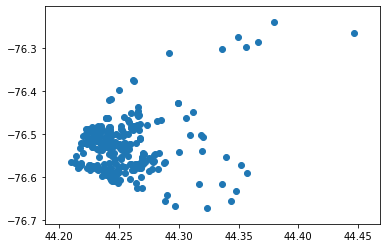

In [118]:
plt.scatter(x=redux['lat'], y=redux['lon'])
plt.show()

In [119]:
from sklearn.cluster import KMeans

In [120]:
sse = []
k_min = 10
k_max = 20
for k in range(k_min, k_max + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(redux[['lat', 'lon']])
    sse.append(kmeans.inertia_)

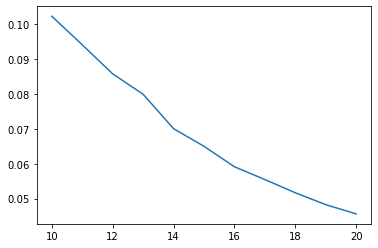

In [121]:
plt.plot(range(k_min, k_max + 1), sse)

In [122]:
from sklearn.metrics import silhouette_score

In [123]:
sc = []
for k in range(k_min, k_max + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(redux[['lat', 'lon']])
    score = silhouette_score(redux[['lat', 'lon']], kmeans.labels_)
    sc.append(score)

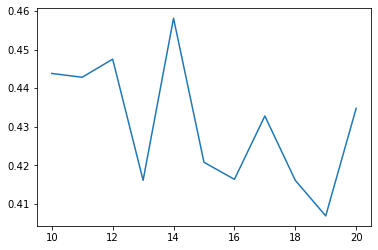

In [124]:
plt.plot(range(k_min, k_max + 1), sc)

In [125]:
k = sc.index(max(sc)) + k_min
print(k)

14


In [126]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(redux[['lat', 'lon']])

KMeans(n_clusters=14)

In [127]:
kmeans.labels_

array([ 0,  6,  0,  0,  6, 11,  6,  6,  0,  0, 13, 13,  9,  6, 13,  0,  9,
       13,  6,  0,  6,  6,  6, 13,  6, 13, 11,  2,  9,  6,  6,  0,  2,  0,
        6,  6,  9,  6,  2,  6,  8,  6,  0,  9,  9,  6,  0,  0,  0,  9,  0,
        2,  0, 11, 12,  6, 11, 13,  0,  2, 13, 11, 11,  2,  2,  2,  2,  9,
        2, 11, 11,  2,  0,  6,  9,  1, 11,  0,  6,  6,  9,  4, 13,  2,  1,
        9, 11,  0,  6, 11,  6,  6, 11,  6,  9,  6,  0,  8,  0,  9,  0, 13,
        0,  7, 10,  6,  0,  6,  0, 13,  8,  6, 13,  4, 12, 11, 11,  2,  0,
        9,  8, 13,  8,  0,  4,  9, 11, 13,  2,  6,  6,  8, 10,  2,  6,  2,
       11, 11,  0,  0,  0,  1,  5,  3,  1,  8,  9,  2,  2, 13, 10,  2,  2,
        6,  8,  6,  0,  6,  9,  6,  6,  2,  0,  9,  0,  6,  0,  2,  2,  2,
        0,  6,  6,  2, 11,  6,  6,  0,  6,  6,  2,  6, 13, 11,  0,  6, 11,
        6,  0,  6, 11,  0,  0,  2,  6, 11, 13,  6, 12, 11,  8,  2,  6,  0,
        6,  9,  6,  9,  2,  6, 11,  0,  0,  0,  6, 13, 11,  0,  6,  6,  6,
        0, 11,  6,  0,  8

In [128]:
redux['centroid'] = kmeans.labels_
redux['centroid'] = redux.centroid.astype(str)

In [129]:
redux.drop(['lat', 'lon'], inplace=True, axis=1)

In [130]:
redux

,Program Subclass,duration,evidence,centroid
0,Sidewalk Rehabilitation,364 days 00:00:00.000000000,0.0,0
1,Local Repair / Preventative Maintenance,364 days 00:00:00.000000000,0.0,6
2,Electrical,364 days 00:00:00.000000000,0.0,0
3,Electrical,364 days 00:00:00.000000000,0.0,0
4,Water,364 days 00:00:00.000000000,1.0,6
...,...,...,...,...
142,Drainage Improvements,514 days 00:00:00.000000000,1.0,12
143,Existing Parks,514 days 00:00:00.000000000,0.0,11
144,Existing Parks,304 days 00:00:00.000000000,1.0,0
145,Drainage Improvements,362 days 00:00:00.000000000,0.0,4


In [131]:
redux.duration = redux.duration.map(lambda val: int(val.split(' ')[0]))
max_duration = redux.duration.max()
min_duration = redux.duration.min()
redux.duration = redux.duration.map(lambda dur: (dur - min_duration) / (max_duration - min_duration))

In [132]:
redux

,Program Subclass,duration,evidence,centroid
0,Sidewalk Rehabilitation,0.225715,0.0,0
1,Local Repair / Preventative Maintenance,0.225715,0.0,6
2,Electrical,0.225715,0.0,0
3,Electrical,0.225715,0.0,0
4,Water,0.225715,1.0,6
...,...,...,...,...
142,Drainage Improvements,0.278700,1.0,12
143,Existing Parks,0.278700,0.0,11
144,Existing Parks,0.204521,1.0,0
145,Drainage Improvements,0.225009,0.0,4


In [133]:
final = pd.get_dummies(redux).copy()

In [134]:
final.isna().sum()

duration                                                         0
evidence                                                         0
Program Subclass_Arterial Widening                               0
Program Subclass_Bike Lane                                       0
Program Subclass_Bridge Construction                             0
Program Subclass_Bus Pad Construction                            0
Program Subclass_Crack Sealing                                   0
Program Subclass_Drainage Improvements                           0
Program Subclass_Electric                                        0
Program Subclass_Electrical                                      0
Program Subclass_Existing Parks                                  0
Program Subclass_Facilities                                      0
Program Subclass_Gas                                             0
Program Subclass_Intersection Improvements                       0
Program Subclass_Joint Reconstruction                         

In [135]:
X = final.drop('evidence', axis=1)
y = final['evidence']

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [140]:
lr.score(X_test, y_test)

0.7446808510638298